# Data exploration 

---

Group name: Group B


---



## Introduction

*This section includes a short description of the data* 

As data set we will use world-cup-2022. 
This data set predicts the Soccer Power Index (SPI) ratings and chances of advancing for every team participating at the World Cup 2022. The data is updating live.
It is divided by data of the matches and data for the forecast. We are focussing on data of the tournament forecast. All in all 4 Visualisations will be created with Module Altair.


## Setup

In [1]:
import pandas as pd
import altair as alt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data

## Import data

In [2]:
import pandas as pd

df_world_cup = pd.read_csv("../data/external/data.csv", sep=",")

### Data structure

In [3]:
df_world_cup.head()

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.99515,0.00485,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-11-28 21:01:22 UTC
1,2022-11-28 20:59:50 UTC,Spain,E,90.62031,2.84092,0.33577,1.61371,1.24833,0.13796,8.04799,...,0.84893,0.14284,0.00823,0.00000,0.99177,0.72213,0.35169,0.23196,0.13658,2022-11-28 21:01:22 UTC
2,2022-11-28 20:59:50 UTC,France,D,90.14910,3.03006,0.45553,2.64890,0.23851,0.11259,5.18540,...,0.99992,0.00008,0.00000,0.00000,1.00000,0.75998,0.47603,0.27224,0.13269,2022-11-28 21:01:22 UTC
3,2022-11-28 20:59:50 UTC,Portugal,H,87.55187,2.81564,0.51015,2.58556,0.24741,0.16703,3.94343,...,0.98834,0.01166,0.00000,0.00000,1.00000,0.65092,0.35302,0.18387,0.08195,2022-11-28 21:01:22 UTC
4,2022-11-28 20:59:50 UTC,Argentina,C,86.02625,2.48839,0.42171,1.57821,0.26472,1.15707,1.89454,...,0.57290,0.20115,0.22498,0.00097,0.77405,0.49381,0.29805,0.12681,0.06528,2022-11-28 21:01:22 UTC


### Data corrections

#### Lowercase and whitespace

In [4]:

df_world_cup.columns = df_world_cup.columns.str.lower().str.replace(' ', '_')
df_world_cup

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,4.94744,...,0.99515,0.00485,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-11-28 21:01:22 UTC
1,2022-11-28 20:59:50 UTC,Spain,E,90.62031,2.84092,0.33577,1.61371,1.24833,0.13796,8.04799,...,0.84893,0.14284,0.00823,0.00000,0.99177,0.72213,0.35169,0.23196,0.13658,2022-11-28 21:01:22 UTC
2,2022-11-28 20:59:50 UTC,France,D,90.14910,3.03006,0.45553,2.64890,0.23851,0.11259,5.18540,...,0.99992,0.00008,0.00000,0.00000,1.00000,0.75998,0.47603,0.27224,0.13269,2022-11-28 21:01:22 UTC
3,2022-11-28 20:59:50 UTC,Portugal,H,87.55187,2.81564,0.51015,2.58556,0.24741,0.16703,3.94343,...,0.98834,0.01166,0.00000,0.00000,1.00000,0.65092,0.35302,0.18387,0.08195,2022-11-28 21:01:22 UTC
4,2022-11-28 20:59:50 UTC,Argentina,C,86.02625,2.48839,0.42171,1.57821,0.26472,1.15707,1.89454,...,0.57290,0.20115,0.22498,0.00097,0.77405,0.49381,0.29805,0.12681,0.06528,2022-11-28 21:01:22 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-11-16 16:00:55 UTC,Saudi Arabia,C,56.86592,1.50018,0.99118,0.59721,0.79021,1.61258,-2.26444,...,0.06973,0.17476,0.29436,0.46115,0.24449,0.06913,0.02164,0.00516,0.00132,2022-11-28 21:01:22 UTC
92,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-11-28 21:01:22 UTC
93,2022-11-16 16:00:55 UTC,Qatar,A,51.00223,1.57111,1.31642,0.56555,0.68681,1.74764,-2.95133,...,0.06806,0.14850,0.25634,0.52710,0.21656,0.06588,0.01840,0.00399,0.00096,2022-11-28 21:01:22 UTC
94,2022-11-16 16:00:55 UTC,Ghana,H,58.62702,1.43347,0.85806,0.46730,0.80877,1.72393,-2.74111,...,0.04662,0.13341,0.28475,0.53522,0.18003,0.03586,0.00945,0.00284,0.00063,2022-11-28 21:01:22 UTC


## Exploratory data analysis

In [7]:
df_world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   forecast_timestamp  96 non-null     object 
 1   team                96 non-null     object 
 2   group               96 non-null     object 
 3   spi                 96 non-null     float64
 4   global_o            96 non-null     float64
 5   global_d            96 non-null     float64
 6   sim_wins            96 non-null     float64
 7   sim_ties            96 non-null     float64
 8   sim_losses          96 non-null     float64
 9   sim_goal_diff       96 non-null     float64
 10  goals_scored        96 non-null     float64
 11  goals_against       96 non-null     float64
 12  group_1             96 non-null     float64
 13  group_2             96 non-null     float64
 14  group_3             96 non-null     float64
 15  group_4             96 non-null     float64
 16  make_round

### Statistics

In [11]:
df_world_cup['goals_scored'].mean()
print(f"mean of goals_scored is {round(df_world_cup['goals_scored'].mean(), 2)}")

df_world_cup['goals_scored'].median()
print(f"median of goals_scored is {round(df_world_cup['goals_scored'].median(), 2)}")

df_world_cup['goals_scored'].std()
print(f"std of goals_scored is {round(df_world_cup['goals_scored'].std(), 2)}")

mean of goals_scored is 3.77
median of goals_scored is 3.37
std of goals_scored is 1.9


In [12]:
df_world_cup.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
spi,96.0,74.14,11.12,48.16,66.07,74.33,82.96,93.66
global_o,96.0,2.11,0.51,1.28,1.69,2.00,2.53,3.22
global_d,96.0,0.69,0.20,0.24,0.57,0.68,0.79,1.32
sim_wins,96.0,1.09,0.64,0.04,0.59,1.06,1.54,2.81
sim_ties,96.0,0.82,0.44,0.14,0.52,0.77,1.17,2.32
sim_losses,96.0,1.09,0.61,0.04,0.59,1.08,1.53,2.78
sim_goal_diff,96.0,0.00,3.04,-10.09,-1.49,-0.15,1.58,8.54
goals_scored,96.0,3.77,1.90,0.60,2.49,3.37,4.76,10.61
goals_against,96.0,3.77,1.81,0.31,2.50,3.59,4.38,11.39
group_1,96.0,0.25,0.28,0.00,0.03,0.14,0.37,1.00


### Horizontal bar chart of goals scored per team

The bar plot shows the relationship between the numeric (goals_scored) and a categoric (team) variable.

In [13]:
# new df with relevant data only

df_newest_date = df_world_cup[df_world_cup['forecast_timestamp'] == '2022-11-28 20:59:50 UTC'] # newest data

In [14]:
df_top_scorer = df_newest_date[["team", "goals_scored"]] #only team, group, goals_scored

df_top_scorer = df_top_scorer.sort_values(by="goals_scored", ascending=False) #sort by goals scored

In [15]:
index = df_top_scorer.index[4] # index of country no.5
value = df_top_scorer["goals_scored"][index] # goals scored of country no.5

In [16]:
df_top_scorer.describe()

,goals_scored
count,32.000000
mean,3.759065
std,2.150123
min,0.604320
25%,2.215172
50%,3.030590
75%,5.088360
max,9.764380


In [102]:
source = df_top_scorer

bar = alt.Chart(source).mark_bar().encode(
    alt.Y('team:N', axis=alt.Axis(title='team'), sort=alt.EncodingSortField(field="goals_scored", op="max", order='descending'), impute=alt.ImputeParams(value=0)), # sorting values
    alt.X('goals_scored', axis=alt.Axis(title='goals scored')),
    color=alt.condition(
        alt.datum.goals_scored >= value, #highlighting the top 5 countries by goals scored
        alt.value('green'),
        alt.value('gray'),
    ),
).resolve_scale(
    y='independent'
).properties(
    title={
      'text': ['Countries sorted by goals scored'], 
      'subtitle': ['Top 5 countries highlighted'],
      'color': '#000000',
      'fontSize': 25,
      'anchor': 'start',
    }
)

bar

alt.Chart(...)

### Interactive grouped scatter plot of defense and offense per country

The interactive scatter plot shows the correlation between the gobal defense (y) and offense (x) of each country. They are grouped by the groups for the 2022 World Cup. Hovering over a point shows the name of the team.

The scatter plot is commonly used to show the relationship between (numeric) variables. The categorial variable is used to group the points, indicated by their color.

In [109]:
# new df with relevant data only

df_newest_date = df_world_cup[df_world_cup['forecast_timestamp'] == '2022-11-28 20:59:50 UTC'] # newest data

In [118]:
df_do_group = df_newest_date[["team", "group", "global_o", "global_d", "spi"]] # only team, group, global_o, global_d and spi
df_do_group

,team,group,global_o,global_d,spi
0,Brazil,G,3.06210,0.23656,93.48139
1,Spain,E,2.84092,0.33577,90.62031
2,France,D,3.03006,0.45553,90.14910
3,Portugal,H,2.81564,0.51015,87.55187
4,Argentina,C,2.48839,0.42171,86.02625
5,England,B,2.54769,0.48612,85.40758
6,Germany,E,3.15327,0.60378,88.86004
7,Netherlands,A,2.59307,0.56564,84.38370
8,Croatia,F,2.30506,0.57143,80.87388
9,Ecuador,A,1.93859,0.56118,75.81562


In [123]:
source = df_do_group

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    #x='global_o:Q',
    x=alt.X('global_o:Q', axis=alt.Axis(title='global offense')), # new title axis
    #y='global_d:Q',
    y=alt.Y('global_d:Q', axis=alt.Axis(title='global defense')), # new title axis
    color=alt.condition(brush, 'group', alt.value('lightgray')),
    tooltip='team' # when hovering --> shows team name
).add_selection(
    brush
).properties(
    title='Global defense and offense per country'
).interactive()

points.configure_title(color='#394c1e', font='Times New Roman', fontSize=20, anchor='start') # configuring color, font and size of title

alt.Chart(...)

### Horizontal grouped bar chart of soccer power index per group

The bar plot shows the relationship between the numeric (soccer power index) and a categoric (team) variable. It is grouped by the categorical variable group and sorted within the group by the power soccer index (descending).

In [21]:
df_spi_group = df_newest_date[["team", "group", "spi"]] # only team, group and soccer power index

In [22]:
df_spi_group.describe()

,spi
count,32.000000
mean,74.372407
std,10.918313
min,48.456570
25%,68.193055
50%,74.200325
75%,81.751335
max,93.481390


The top 25% of soccer teams have a soccer power index above 81.75.

In [100]:
source = df_spi_group

bar = alt.Chart(source).mark_bar().encode(
    #x='team',
    #y='spi',
    #row='group'
    alt.Y('team:N', axis=alt.Axis(title='country'), sort=alt.EncodingSortField(field="spi", op="max", order='descending'), impute=alt.ImputeParams(value=0)), # sorting values
    alt.X('spi', axis=alt.Axis(title='soccer power index')),
    tooltip=alt.Tooltip("spi", format=",.2f"),
    color=alt.condition(
        alt.datum.spi > 81.75, # highlighting the top 25% according to the soccer power index
        alt.value('green'),
        alt.value('gray'),
    )
).facet(
    row=alt.Row('group:N'), # grouping values by group
).resolve_scale(
    y='independent'
).properties(
    title={
      'text': ['Soccer power index per country'], 
      'subtitle': ['The top 25% countries are highlighted in green'],
      'color': '#394c1e',
      'subtitleColor': 'gray',
      'fontSize': 25,
      'anchor': 'start',
    }
).interactive()

#bar.configure_title(color='#394c1e', font='Times New Roman', fontSize=20, anchor='start') # configuring color, font and size of title
bar

alt.FacetChart(...)

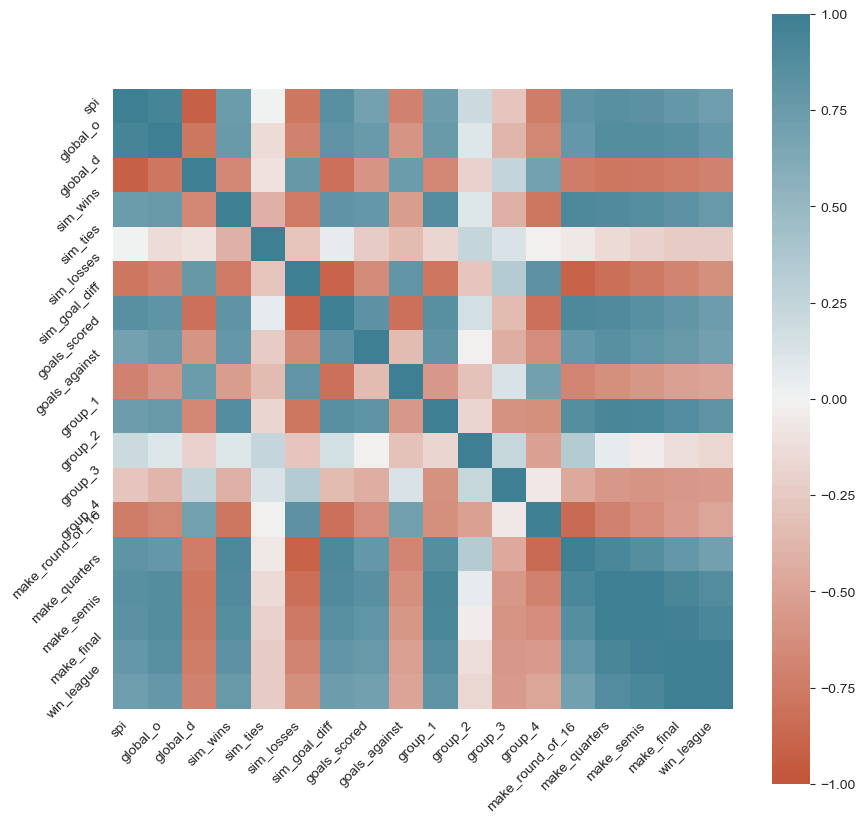

In [24]:
## Correlation

import matplotlib.pyplot as plt
import seaborn as sns

df_world_cup_corr = df_world_cup.copy()
df_world_cup_corr.corr()
plt.figure(figsize=(10,10))
corr = df_world_cup_corr.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,

);

In [124]:
import plotly.graph_objects as go
import plotly

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_world_cup.team,
    y=df_world_cup.sim_wins,
    name='win',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=df_world_cup.team,
    y=df_world_cup.sim_ties,
    name='draw',
    marker_color='grey'
))

fig.add_trace(go.Bar(
    x=df_world_cup.team,
    y=df_world_cup.sim_losses,
    name='loss',
    marker_color='red'
))

# fig.update_layout(template='plotly_dark')
fig.update_layout(title="Countries: Sim Wins/Ties/Losses",
                  xaxis_title = "Country Name", yaxis_title= "Score")

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [126]:
import plotly.express as px

average_score = df_world_cup.groupby(['team'])['spi'].mean().sort_values(ascending=False).head(15)
average_score_df = pd.DataFrame({'team':average_score.index, 'spi':average_score.values})

fig = px.bar(average_score_df,
             x='team',
             y='spi',
             color='spi',
             text_auto=True,
             labels={'team':'Country', 'value':'Soccer Power Index'},
             color_continuous_scale=px.colors.sequential.Pinkyl,
             width=1000,
             height=600
             )
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                  title={
                      'text': "Top 15 Countries ordered by Soccer Power Index",
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'})



In [98]:
dfg = df_world_cup.groupby(['team', 'win_league','spi']).size().to_frame().sort_values(['spi'], ascending = False).head(30).reset_index()

fig = px.scatter(dfg, x="spi", y = "win_league",size='win_league', color="team", labels={'spi':'Soccer Power Index', 'win_league':'Chance to win league'}, width=1000, height=600)

fig.update_layout(
    title={
        'text': "Chance to win the league compared to Soccer Power Index",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


fig.show()

# Germany clear outlier :D

In [74]:
dfg.head(10)

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,0,2022-11-28 20:59:50 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81289,0.15059,0.03652,...,0.99515,0.00485,0.00000,0.00000,1.00000,0.82256,0.53731,0.39419,0.26002,2022-11-28 21:01:22 UTC
1,1,2022-11-28 20:59:50 UTC,Spain,E,90.62031,2.84092,0.33577,1.61371,1.24833,0.13796,...,0.84893,0.14284,0.00823,0.00000,0.99177,0.72213,0.35169,0.23196,0.13658,2022-11-28 21:01:22 UTC
2,2,2022-11-28 20:59:50 UTC,France,D,90.14910,3.03006,0.45553,2.64890,0.23851,0.11259,...,0.99992,0.00008,0.00000,0.00000,1.00000,0.75998,0.47603,0.27224,0.13269,2022-11-28 21:01:22 UTC
3,3,2022-11-28 20:59:50 UTC,Portugal,H,87.55187,2.81564,0.51015,2.58556,0.24741,0.16703,...,0.98834,0.01166,0.00000,0.00000,1.00000,0.65092,0.35302,0.18387,0.08195,2022-11-28 21:01:22 UTC
4,4,2022-11-28 20:59:50 UTC,Argentina,C,86.02625,2.48839,0.42171,1.57821,0.26472,1.15707,...,0.57290,0.20115,0.22498,0.00097,0.77405,0.49381,0.29805,0.12681,0.06528,2022-11-28 21:01:22 UTC
5,5,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,...,0.82096,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-11-28 21:01:22 UTC
6,6,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,...,0.00000,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-11-28 21:01:22 UTC
7,7,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,...,0.75673,0.23478,0.00849,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-11-28 21:01:22 UTC
8,8,2022-11-28 20:59:50 UTC,Croatia,F,80.87388,2.30506,0.57143,1.38931,1.28598,0.32471,...,0.54603,0.21259,0.24138,0.00000,0.75862,0.31783,0.13829,0.06419,0.02540,2022-11-28 21:01:22 UTC
9,9,2022-11-28 20:59:50 UTC,Ecuador,A,75.81562,1.93859,0.56118,1.36865,1.33448,0.29687,...,0.17704,0.53220,0.29076,0.00000,0.70924,0.31610,0.12525,0.04497,0.01607,2022-11-28 21:01:22 UTC
